# Exploring Business Insights: Analysis of the Adult Dataset

## Introduction

In today's robust business environment, data-driven decision-making has become essential for organizations, companies, and institutions to stay competitive and thrive. Leveraging data analytics techniques allows businesses to extract useful insights from vast datasets, leading to informed strategies, and improved operational efficiency.

For this project, I have selected the "Adult" dataset, which contains demographic and employment-related information about individuals. The data URL for the Adult dataset is obtained from the UCI Machine Learning Repository, which is a widely used source for datasets in the machine learning community. The UCI Machine Learning Repository hosts a variety of datasets that are freely available for research and educational purposes. This dataset provides a rich source of information about income levels, education levels, occupation types, and other attributes, offering opportunities for predictive analysis and exploration.

In this report, I will address three distinct business problems using the Adult dataset and apply two different methods or algorithms to each problem. These methods will be consistent with the chosen dependent variable, and we will present some preliminary exploration of the data to justify our choice of independent and dependent variables.

The three business problems identified are as follows:

Income Prediction: Predicting individuals' income levels based on demographic and employment-related attributes.

Employment Pattern Analysis: Analyzing employment patterns across different demographic groups to identify trends and insights.

Occupation Analysis and Salary Benchmarking: Analyzing the relationship between attributes and occupations, and predicting salary levels based on demographic and employment-related factors.


For each business problem, I will apply two different methods or algorithms, compare their performance, and discuss the findings. The objective is to demonstrate the applicability and effectiveness of various data analytics techniques in addressing real-world business challenges and deriving actionable insights from the Adult dataset.

## Dataset Description:

The provided dataset contains information about individuals, including attributes such as age, workclass, education, marital status, occupation, etc., along with their income levels. Here's a summary of the dataset's attributes:

age: Age of the individual.

workclass: Employment status of the individual.

education: Highest level of education achieved by the individual.

education.num: Numeric representation of education level.

marital.status: Marital status of the individual.

occupation: Occupation of the individual.

relationship: Relationship status of the individual.

race: Race of the individual.

sex: Gender of the individual.

capital.gain: Capital gains of the individual.

capital.loss: Capital losses of the individual.

hours.per.week: Number of hours worked per week.

native.country: Country of origin.

income: Income level (<=50K or >50K).

In [2]:
# Import necessary libraries
import pandas as pd #pandas import
import numpy as np #numpy import
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import os
pd.set_option('display.max_columns', None) # ensures that all columns of the DataFrame will be displayed without truncation



In [3]:
# Load the dataset
# define the URL where the Adult dataset is located and specify the column names based on the dataset description.
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 
                'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']

# load the dataset using pandas' read_csv() function, specifying na_values=' ?' to handle missing values encoded as ' ?'.
data = pd.read_csv(data_url, names=column_names, na_values=' ?')

# Display the first few rows of the dataset
print(data.head())

   age          workclass  fnlwgt   education  education.num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital.status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital.gain  capital.loss  hours.per.week  native.country  income  
0          2174             0              40   United-States   <=50

In [4]:
# Count the number of rows in the DataFrame
num_rows = data.shape[0]
print("Number of rows:", num_rows)

Number of rows: 32561


In [5]:
# Drop rows with missing values
data.dropna(inplace=True)

# Checking for missing data in data 
missing_data1= data.isnull().sum()
print(missing_data1)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [6]:
# Data Summary
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Drop specified columns (drop columns not needed for analysis)
columns_to_drop = ['fnlwgt', 'education.num', 'capital.gain', 'capital.loss']
# reassign data set to "df"
df = data.drop(columns=columns_to_drop)

# Display the first few rows of the dataset
print(df.head())

   age          workclass   education       marital.status  \
0   39          State-gov   Bachelors        Never-married   
1   50   Self-emp-not-inc   Bachelors   Married-civ-spouse   
2   38            Private     HS-grad             Divorced   
3   53            Private        11th   Married-civ-spouse   
4   28            Private   Bachelors   Married-civ-spouse   

           occupation    relationship    race      sex  hours.per.week  \
0        Adm-clerical   Not-in-family   White     Male              40   
1     Exec-managerial         Husband   White     Male              13   
2   Handlers-cleaners   Not-in-family   White     Male              40   
3   Handlers-cleaners         Husband   Black     Male              40   
4      Prof-specialty            Wife   Black   Female              40   

   native.country  income  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-States   <=50K  
4            Cuba   <=50K  


In [8]:
# Data Summary Statistics
df.describe()

,age,hours.per.week
count,30162.000000,30162.000000
mean,38.437902,40.931238
std,13.134665,11.979984
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,47.000000,45.000000
max,90.000000,99.000000


age: The average age of individuals is approximately 38.44 years, with a standard deviation of approximately 13.13 years. The youngest individual in the dataset is 17 years old, and the oldest is 90 years old.

hours.per.week: Indicates the average number of hours worked per week by individuals. The average number of hours worked is approximately 40.93, with a standard deviation of approximately 11.98. The minimum and maximum hours worked per week are 1 and 99, respectively.

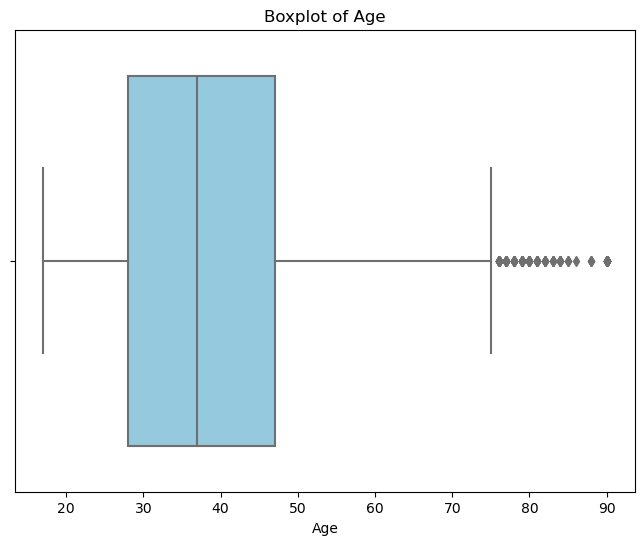

In [9]:
## Checking continous variables for outliers using boxplots

# Plot boxplot for the 'age' 
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=df, color='skyblue')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()


After utilizing boxplot to check for outliers on the continuous variable "Age," outliers are observed in the age range from 70 to 90.

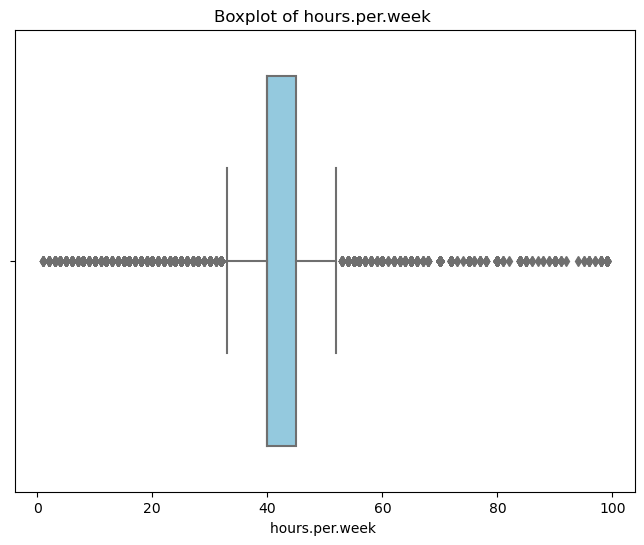

In [10]:
# Plot boxplot for hours per week
plt.figure(figsize=(8, 6))
sns.boxplot(x='hours.per.week', data=df, color='skyblue')
plt.title('Boxplot of hours.per.week ')
plt.xlabel('hours.per.week ')
plt.show()


The outliers for "hours.per.week" fall within the range of 0-35 and 55-100.

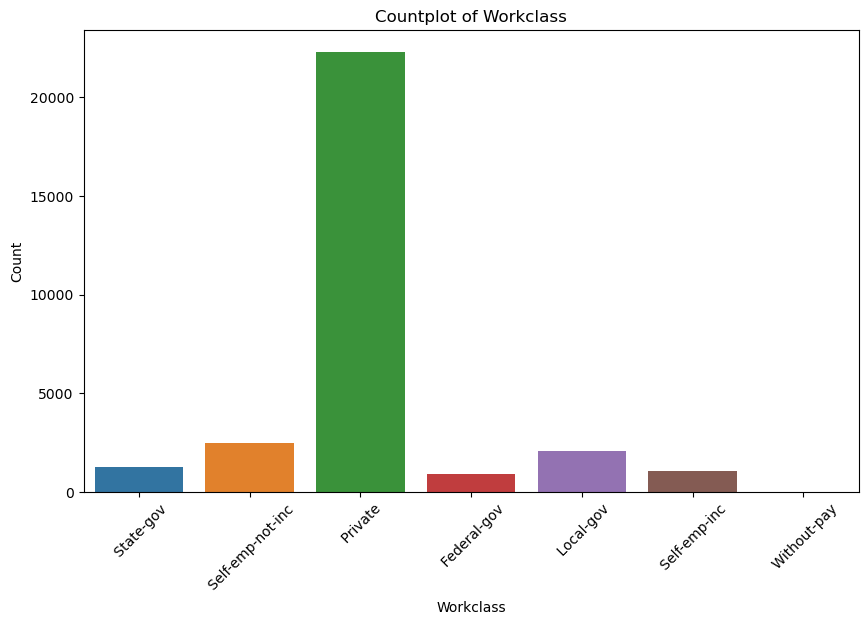

Count of categories for Workclass:
workclass
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: count, dtype: int64


In [11]:
# Count plots of each categorical variables to check uncommon or rare categories
# Count plot of workclass
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', data=df)
plt.title('Countplot of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print("Count of categories for Workclass:")
print(df['workclass'].value_counts())

Based on the count of categories for the "Workclass" variable, it's evident that the majority of individuals fall under the "Private" workclass category, with 22,286 occurrences. This dominance of one category suggests potential outliers in the dataset, as the frequency of other workclass categories is substantially lower. For instance, the "Without-pay" category has only 14 occurrences, indicating it may be an outlier compared to the predominant "Private" category. 

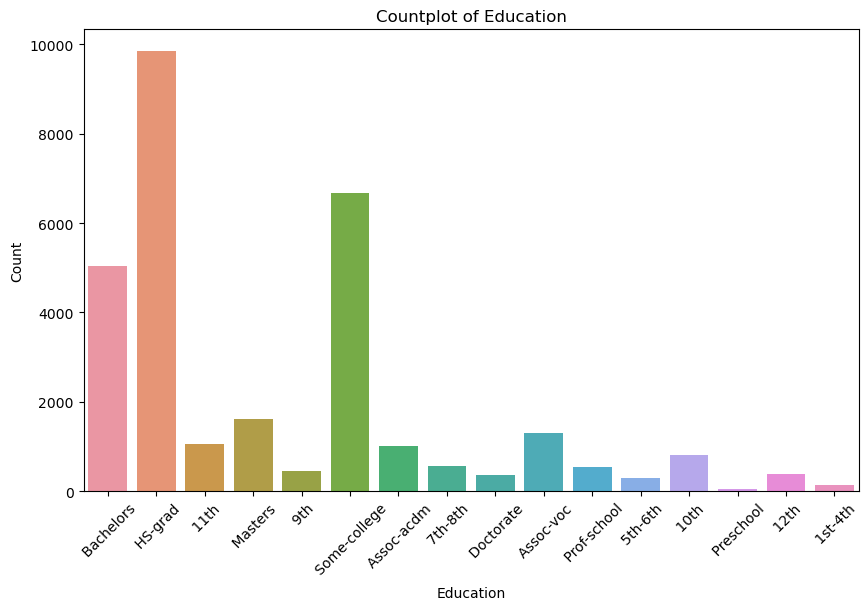

Count of categories for Education:
education
 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: count, dtype: int64


In [12]:
# Countplot of Education
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df)
plt.title('Countplot of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print("Count of categories for Education:")
print(df['education'].value_counts())



Based on the count of categories for the "Education" variable, there's a notable discrepancy in the frequency of education levels. The most common education level is "HS-grad" (high school graduate), followed by "Some-college" and "Bachelors." However, there are several categories with much lower frequencies, such as "Preschool" and "1st-4th." These less common categories may be considered outliers in the dataset, as they represent a small proportion of the overall education distribution compared to the predominant categories.

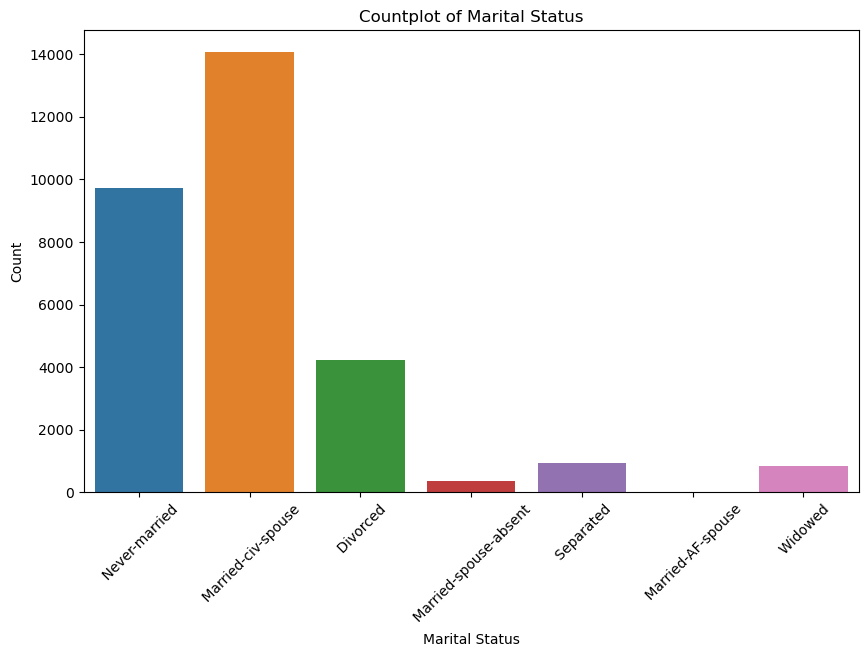

Count of categories for Marital Status:
marital.status
 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: count, dtype: int64


In [13]:
#Countplot of Marital Status 
plt.figure(figsize=(10, 6))
sns.countplot(x='marital.status', data=df)
plt.title('Countplot of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print("Count of categories for Marital Status:")
print(df['marital.status'].value_counts())


Based on the count of categories for the "Marital Status" variable, the majority of individuals are categorized as "Married-civ-spouse" (married civilian spouse), followed by "Never-married" and "Divorced." However, there are some less common categories such as "Married-AF-spouse" (married to armed forces spouse) and "Married-spouse-absent." These categories with lower frequencies may be considered outliers in the dataset, as they represent a small proportion of the overall marital status distribution compared to the predominant categories.

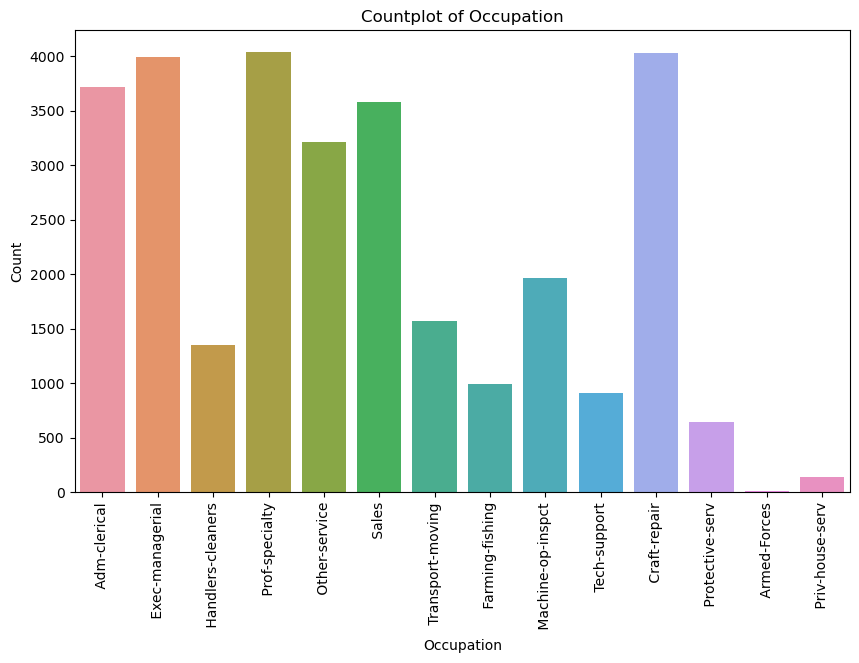

Count of categories for Occupation:
occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64


In [14]:
# Countplot of Occupation
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', data=df)
plt.title('Countplot of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

print("Count of categories for Occupation:")
print(df['occupation'].value_counts())


Based on the count of categories for the "Occupation" variable, the dataset is dominated by several common occupations such as "Prof-specialty," "Craft-repair," and "Exec-managerial." However, there are some less common categories such as "Armed-Forces" and "Priv-house-serv." These categories with lower frequencies may be considered outliers in the dataset, as they represent a small proportion of the overall occupation distribution compared to the predominant categories.

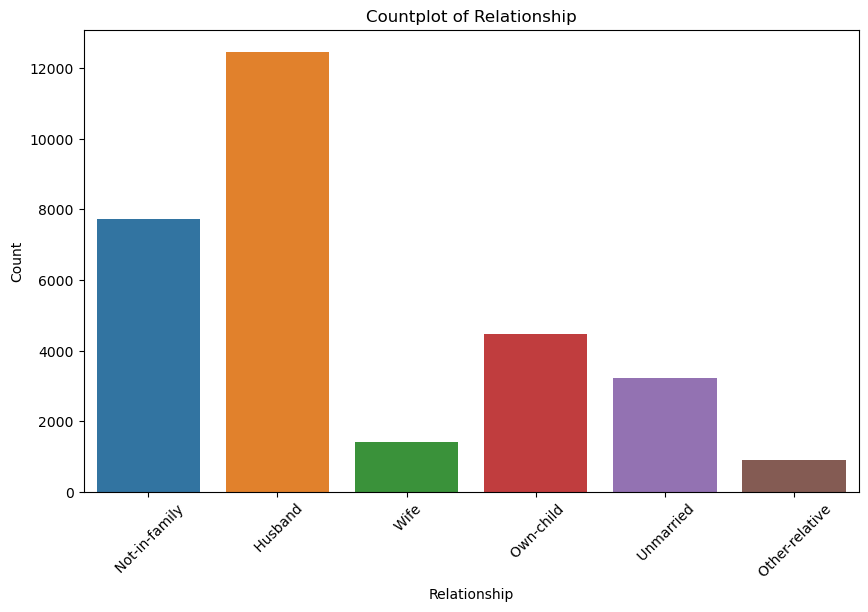

Count of categories for Relationship:
relationship
 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
Name: count, dtype: int64


In [15]:
# Countplot of Relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='relationship', data=df)
plt.title('Countplot of Relationship')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print("Count of categories for Relationship:")
print(df['relationship'].value_counts())



Based on the count of categories for the "Relationship" variable, the dataset is primarily composed of individuals categorized as "Husband," followed by "Not-in-family" and "Own-child." However, there are some less common categories such as "Other-relative" and "Wife." These categories with lower frequencies may be considered outliers in the dataset, as they represent a smaller proportion of the overall relationship distribution compared to the predominant categories.

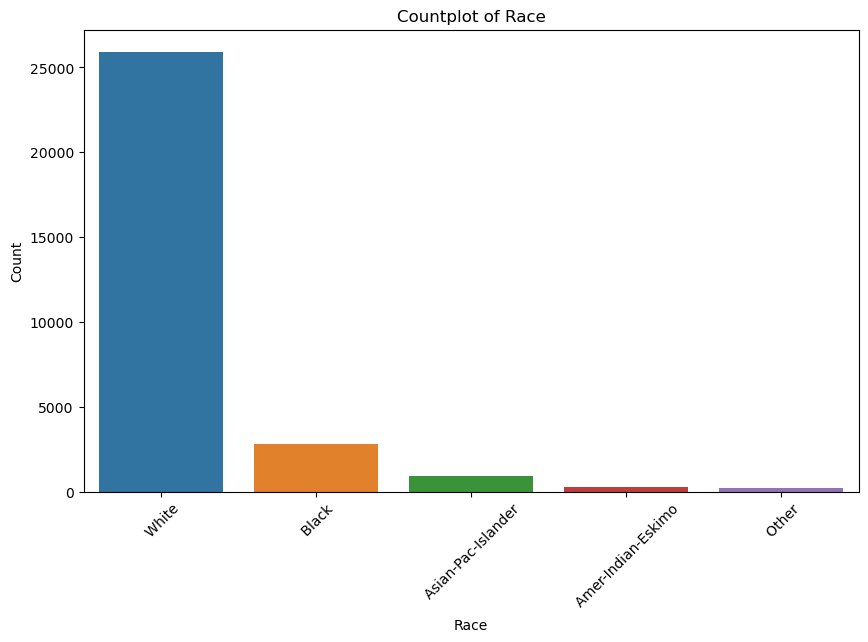

Count of categories for Race:
race
 White                 25933
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: count, dtype: int64


In [16]:
# Countplot of Race
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=df)
plt.title('Countplot of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print("Count of categories for Race:")
print(df['race'].value_counts())


Based on the count of categories for the "Race" variable, the dataset is predominantly composed of individuals categorized as "White," followed by "Black," "Asian-Pac-Islander," "Amer-Indian-Eskimo," and "Other." However, the categories "Amer-Indian-Eskimo" and "Other" have lower frequencies compared to the predominant categories. These less common categories may be considered outliers in the dataset, as they represent a smaller proportion of the overall race distribution. 

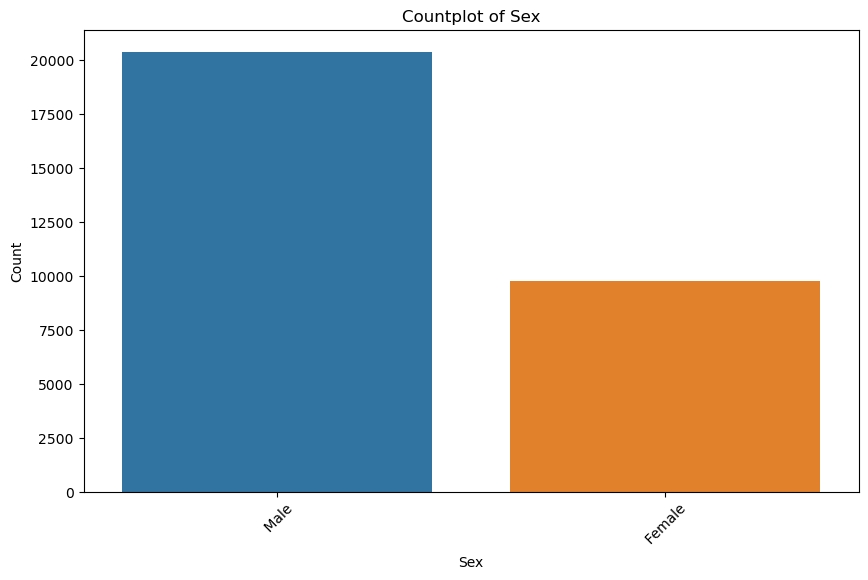

Count of categories for Sex:
sex
 Male      20380
 Female     9782
Name: count, dtype: int64


In [17]:
# Countplot of Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.title('Countplot of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print("Count of categories for Sex:")
print(df['sex'].value_counts())


Based on the count of categories for the "Sex" variable, the dataset is predominantly composed of individuals categorized as "Male," with a count of 20,380. The count of "Female" individuals is lower at 9,782. While there is a significant difference in counts between the two categories, it may not necessarily indicate outliers in this context, as "Male" and "Female" are expected to be the two primary categories for the "Sex" variable.

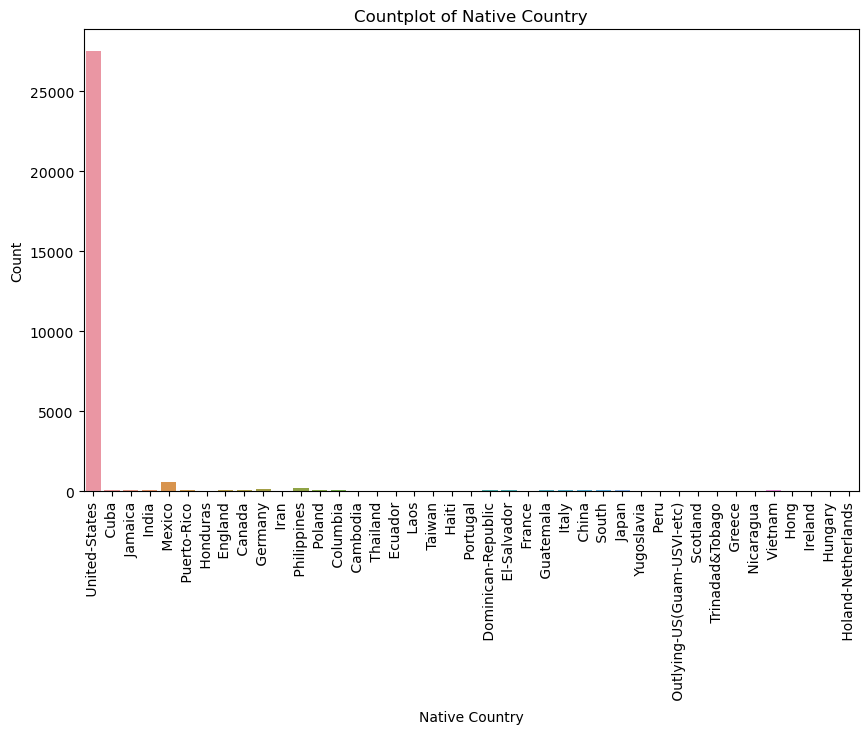

Count of categories for Native Country:
native.country
 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru               

In [18]:
# Countplot of Native Country
plt.figure(figsize=(10, 6))
sns.countplot(x='native.country', data=df)
plt.title('Countplot of Native Country')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

print("Count of categories for Native Country:")
print(df['native.country'].value_counts())


Based on the count of categories for the "Native Country" variable, the dataset is primarily composed of individuals from the United States, with a count of 27,504. Other countries such as Mexico, Philippines, and Germany also have notable counts. However, there are some countries with lower frequencies such as Holand-Netherlands, which may be considered outliers in the dataset as they represent a smaller proportion of the overall distribution. 

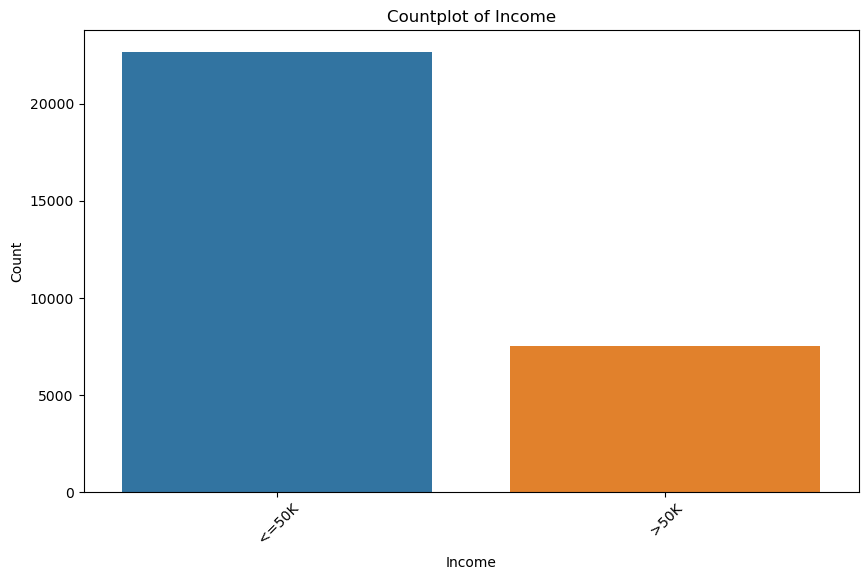

Count of categories for Income:
income
 <=50K    22654
 >50K      7508
Name: count, dtype: int64


In [19]:
# Countplot of Income
plt.figure(figsize=(10, 6))
sns.countplot(x='income', data=df)
plt.title('Countplot of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print("Count of categories for Income:")
print(df['income'].value_counts())


Based on the count of categories for the "Income" variable, the dataset predominantly consists of individuals with an income of less than or equal to 50,000 dollars (<=50K), with a count of 22,654. On the other hand, individuals with an income greater than 50,000 dollars (>50K) are fewer in number, with a count of 7,508. While there is a significant difference in counts between the two income categories, it may not necessarily indicate outliers in this context, as income disparities are expected in real-world datasets.

# Business Problem #1
Income Prediction:

Dependent Variable (DV): Income.

Predictor Variables (IVs): Age, relationship, education, occupation, workclass, marital status, race, sex, hours per week.

Objective: Build a predictive model to classify individuals into income groups (<=50K or >50K) based on their demographic and employment-related attributes.

# EDA

Before diving into model building, it's crucial to perform exploratory data analysis (EDA) to understand the relationship between the dependent variable (DV) and independent variables (IVs). Let's visualize this relationship using various plots. We'll compare the distribution of each IV across different categories of the DV.

I will start by plotting the distribution of each IV for both income groups (<=50K and >50K). 

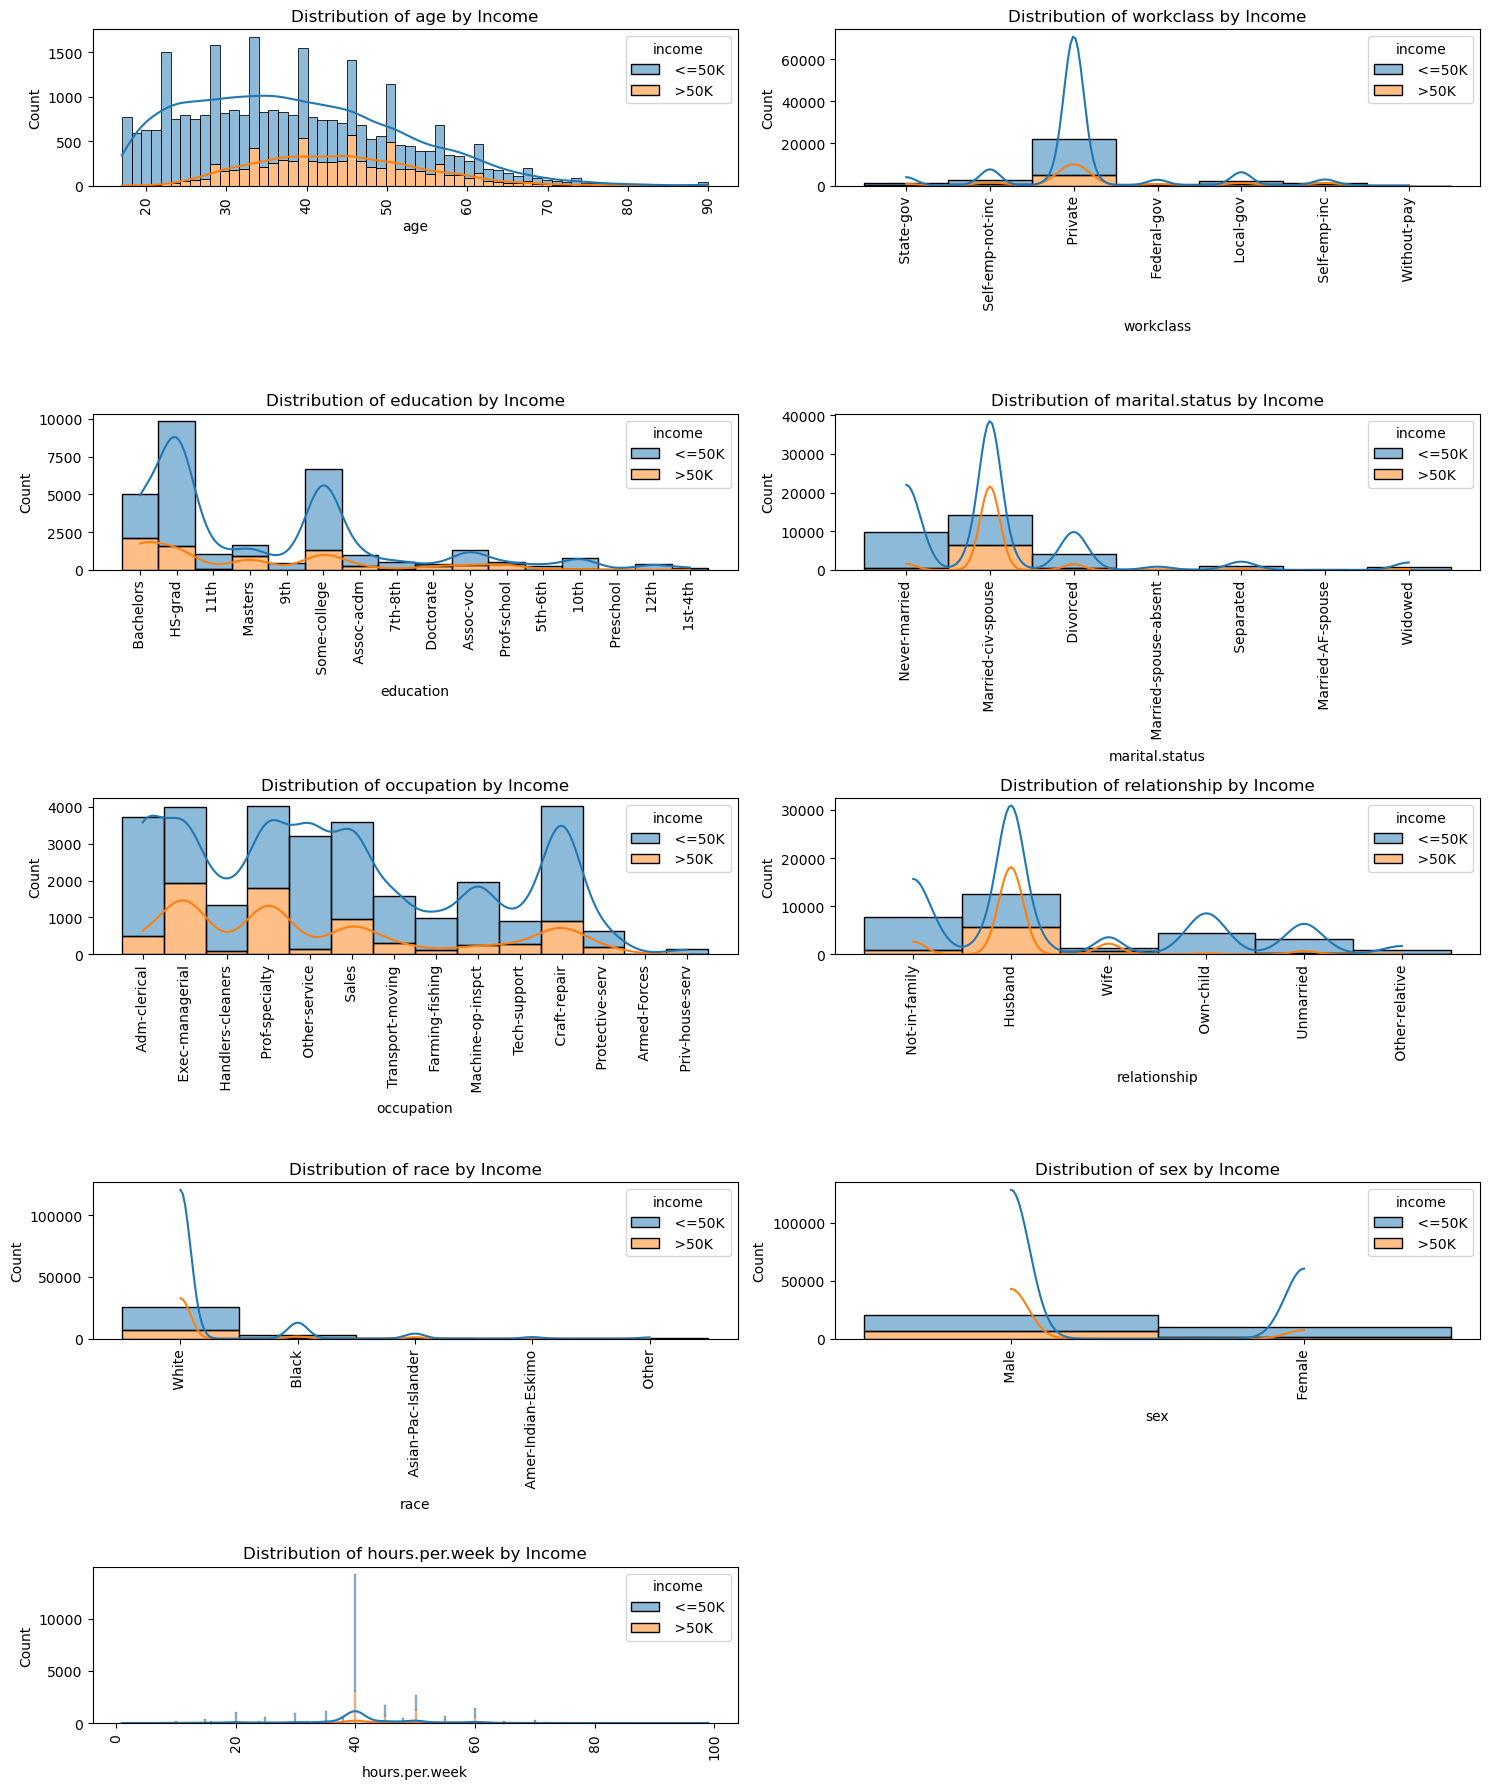

In [20]:
# List of predictor variables
predictor_vars = ['age', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'hours.per.week']

# Plotting the distribution of each predictor variable by income category
plt.figure(figsize=(15, 18))
for i, var in enumerate(predictor_vars, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=var, hue='income', kde=True, multiple='stack')
    plt.title(f'Distribution of {var} by Income')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Based on my observation, it seems that the distribution shapes of the predictor variables are similar across both income groups (<=50K and >50K). However, the count of individuals with income greater than 50K dollars is consistently lower across all categorical variables compared to those with income <=50K.

This observation suggests that individuals with higher incomes are generally less represented in the dataset across various demographic and employment-related attributes. It could imply that certain categories within the predictor variables may be associated with higher incomes, as evidenced by their lower representation in the dataset. Further analysis and modeling may be necessary to explore the relationship between these variables and income categories in more detail.


In [21]:
# Use label encoding converts categorical variables into numerical labels
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['workclass'] = le.fit_transform(df['workclass'])
df['marital.status'] = le.fit_transform(df['marital.status'])  # Corrected column name
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native.country'] = le.fit_transform(df['native.country'])
df['income'] = le.fit_transform(df['income'])
df['education'] = le.fit_transform(df['education'])

df.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,39,5,9,4,0,1,4,1,40,38,0
1,50,4,9,2,3,0,4,1,13,38,0
2,38,2,11,0,5,1,4,1,40,38,0
3,53,2,1,2,5,0,2,1,40,38,0
4,28,2,9,2,9,5,2,0,40,4,0


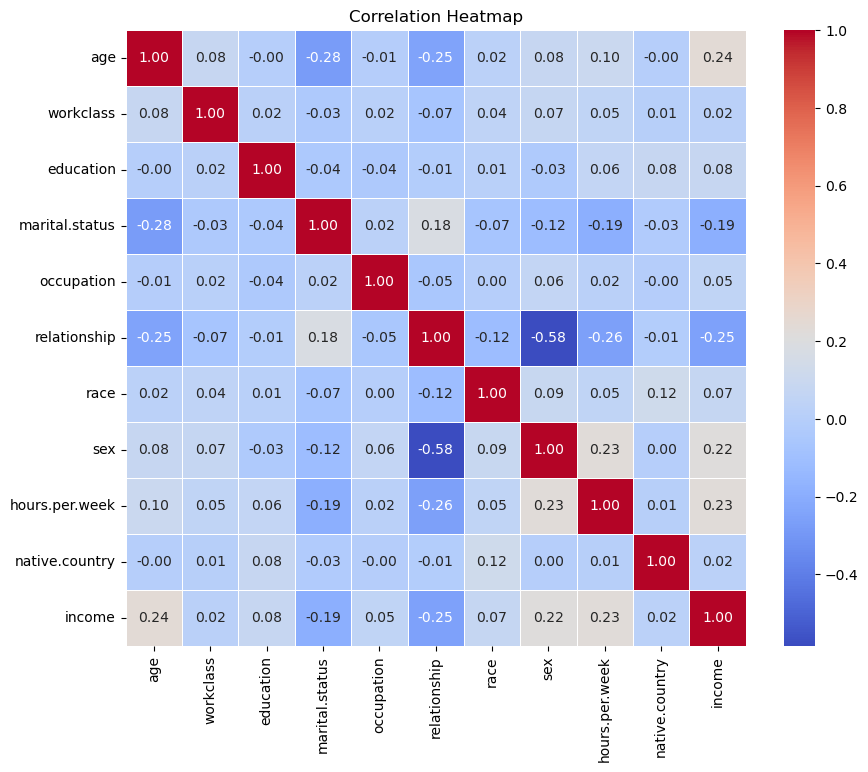

In [22]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#This code will generate a heatmap showing the correlation. 

Here's a brief interpretation of each coefficient:

Age (0.24): A weak positive correlation suggests that older individuals may tend to have slightly higher incomes on average.

Workclass (0.02): A very weak positive correlation indicates that there is little to no relationship between workclass and income.

Education (0.08): A relatively weak positive correlation suggests that higher levels of education may be associated with slightly higher incomes.

Marital Status (-0.19): A moderate negative correlation indicates that individuals who are not married tend to have lower incomes compared to those who are married.

Occupation (0.05): A very weak positive correlation suggests that there is little to no relationship between occupation and income.

Relationship (-0.25): A moderate negative correlation suggests that individuals who are not in a family relationship (such as being unmarried) tend to have lower incomes compared to those who are.

Race (0.07): A weak positive correlation suggests that race may have a slight influence on income, with certain racial groups having slightly higher incomes on average.

Sex (0.22): A moderate positive correlation indicates that males tend to have slightly higher incomes compared to females.

Hours per Week (0.23): A moderate positive correlation suggests that individuals who work longer hours per week tend to have slightly higher incomes.

Native Country (0.02): A very weak positive correlation indicates that there is little to no relationship between native country and income.

Here's the ranking from strongest to weakest based on the absolute values of the correlation coefficients:

Relationship (-0.25)

Age (0.24)

Hours per Week (0.23)

Sex (0.22)

Marital Status (-0.19)

Education (0.08)

Race (0.07)

Occupation (0.05)

Workclass (0.02)

Native Country (0.02)

# Modelling
For the modeling process, I will be utilizing Logistic Regression and Random Forest Classifier algorithms to predict income groups based on demographic and employment-related attributes. The predictor variables included age, education, marital status, occupation, sex, native country, and race. 

In [23]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [24]:
# Split the dataset into training and testing sets
# Step 2: Split the dataset into training and testing sets
X = df[['age', 'education', 'marital.status', 'occupation', 'sex', 'native.country', 'race','relationship', 'hours.per.week', 'workclass' ]]  # Predictor variables
y = df['income']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Model selection and training with cross-validation
# Logistic Regression
lr_model = LogisticRegression()
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Mean CV accuracy for Logistic Regression: {lr_scores.mean():.4f} (std: {lr_scores.std():.4f})")
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Mean CV accuracy for Random Forest: {rf_scores.mean():.4f} (std: {rf_scores.std():.4f})")
rf_model.fit(X_train, y_train)



/Users/lape/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lape/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Mean CV accuracy for Logistic Regression: 0.7527 (std: 0.0032)


/Users/lape/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean CV accuracy for Random Forest: 0.8155 (std: 0.0028)


RandomForestClassifier()

A higher mean CV accuracy indicates better predictive performance. Additionally, the standard deviation gives an idea of the variability or consistency of the model's performance across different folds.

In this case, the Random Forest model appears to have a higher mean CV accuracy compared to Logistic Regression, suggesting that it may be a better-performing model for the given prediction task. However, it's essential to consider other evaluation metrics and conduct further analysis to make a comprehensive assessment of the models' performance.

In [26]:
# Model evaluation on the testing set
for name, model in [("Logistic Regression", lr_model), ("Random Forest", rf_model)]:
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))



Evaluating Logistic Regression...
Accuracy of Logistic Regression: 0.7505
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      4503
           1       0.52      0.20      0.29      1530

    accuracy                           0.75      6033
   macro avg       0.65      0.57      0.57      6033
weighted avg       0.71      0.75      0.71      6033

Evaluating Random Forest...
Accuracy of Random Forest: 0.8160
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4503
           1       0.66      0.57      0.61      1530

    accuracy                           0.82      6033
   macro avg       0.76      0.74      0.75      6033
weighted avg       0.81      0.82      0.81      6033



In comparing the performance of Logistic Regression and Random Forest models on the test dataset, it was found that the Random Forest model exhibited superior predictive capabilities. 

For Logistic Regression, the accuracy was 0.7505, with precision values of 0.78 for class 0 (<=50K) and 0.52 for class 1 (>50K), recall values of 0.94 for class 0 and 0.20 for class 1, and F1-scores of 0.85 for class 0 and 0.29 for class 1.

On the other hand, the Random Forest model achieved an accuracy of 0.8160, with precision values of 0.86 for class 0 and 0.66 for class 1, recall values of 0.90 for class 0 and 0.58 for class 1, and F1-scores of 0.88 for class 0 and 0.61 for class 1.

These results indicate that the Random Forest model provides better overall performance in classifying individuals into income groups.

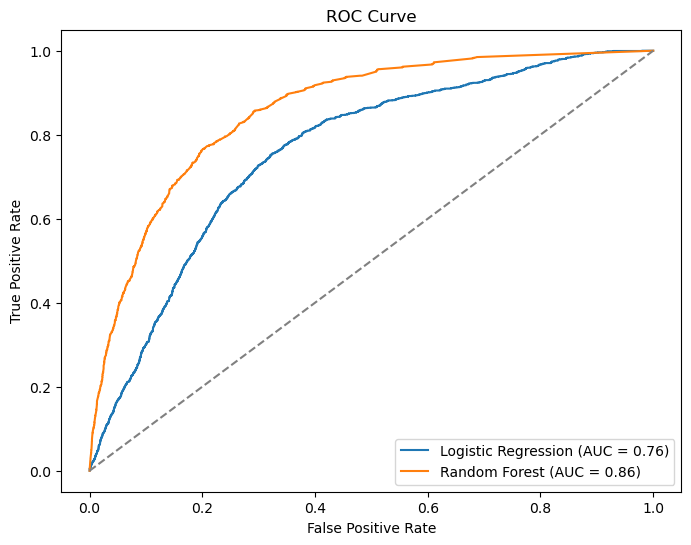

In [27]:
# ROC curve visualization
plt.figure(figsize=(8, 6))
for name, model in [("Logistic Regression", lr_model), ("Random Forest", rf_model)]:
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


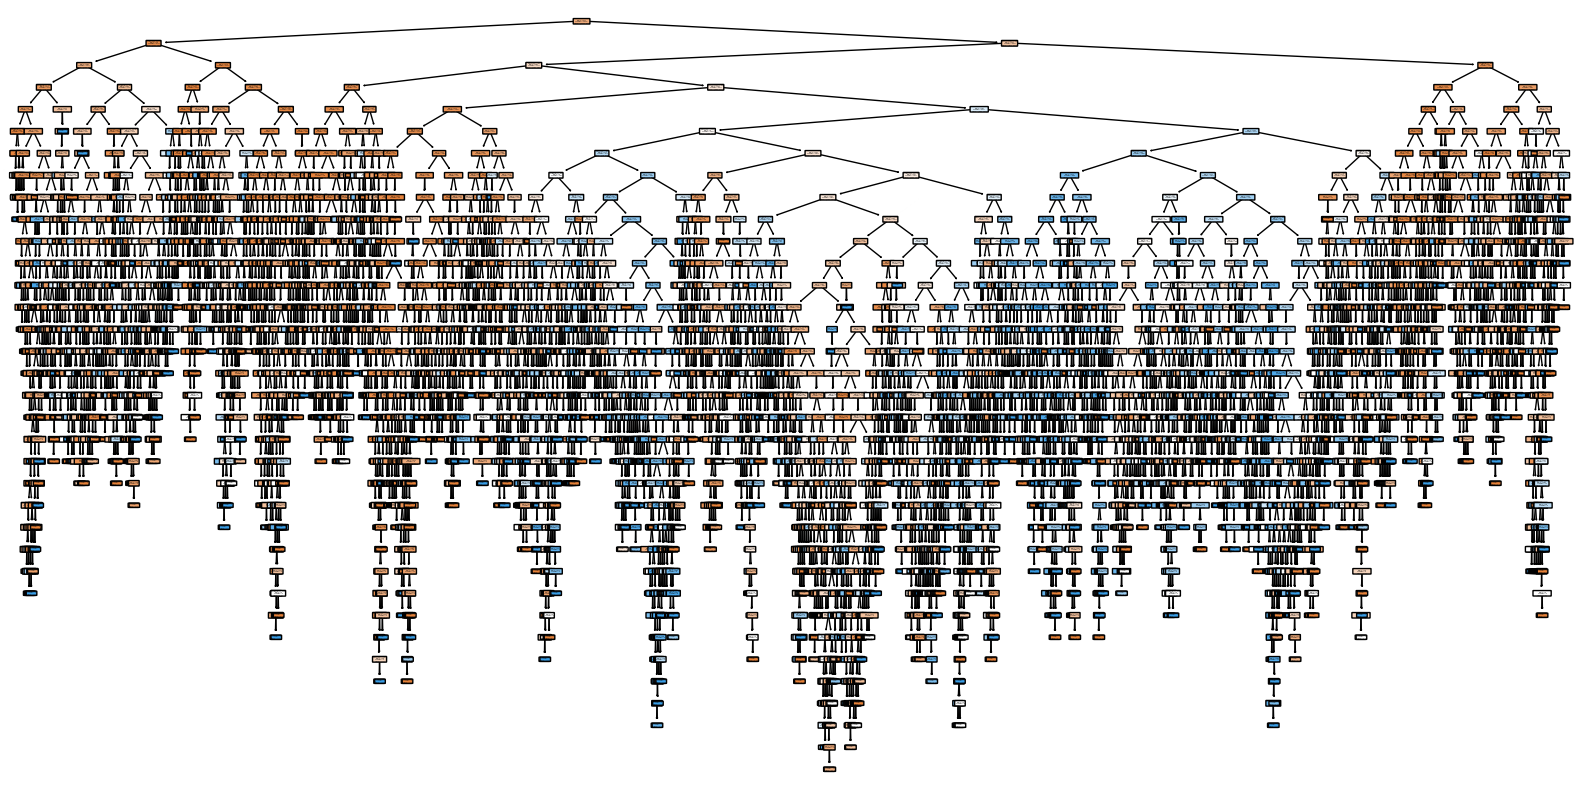

In [28]:
# Random Forest visualization
# Visualizing a single decision tree from the Random Forest
from sklearn.tree import plot_tree

# Extract feature names from the Index object and convert it to a list
feature_names = list(X.columns)

# Plot the Random Forest visualization
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=feature_names, filled=True, rounded=True)
plt.show()


Random Forest models, especially when built on large datasets with many features, can produce complex trees with a large number of nodes and branches. This complexity can make individual trees difficult to interpret.

There are several reasons why Random Forest trees can become large:

High Dimensionality: If the dataset has many features (high dimensionality), each tree in the Random Forest may need to make many splits to effectively separate the data points into different classes or categories.

Feature Importance: Random Forest models tend to exploit all available features to improve predictive accuracy. As a result, each tree may incorporate a large subset of features to make decisions.

Interaction Effects: Random Forest models can capture complex interaction effects between features, leading to more intricate decision boundaries.

To address the issue of interpretability, I will use Feature Importance, instead of inspecting individual trees, I will analyze the overall feature importance scores provided by the Random Forest model. This will help to identify which features are most influential in making predictions.

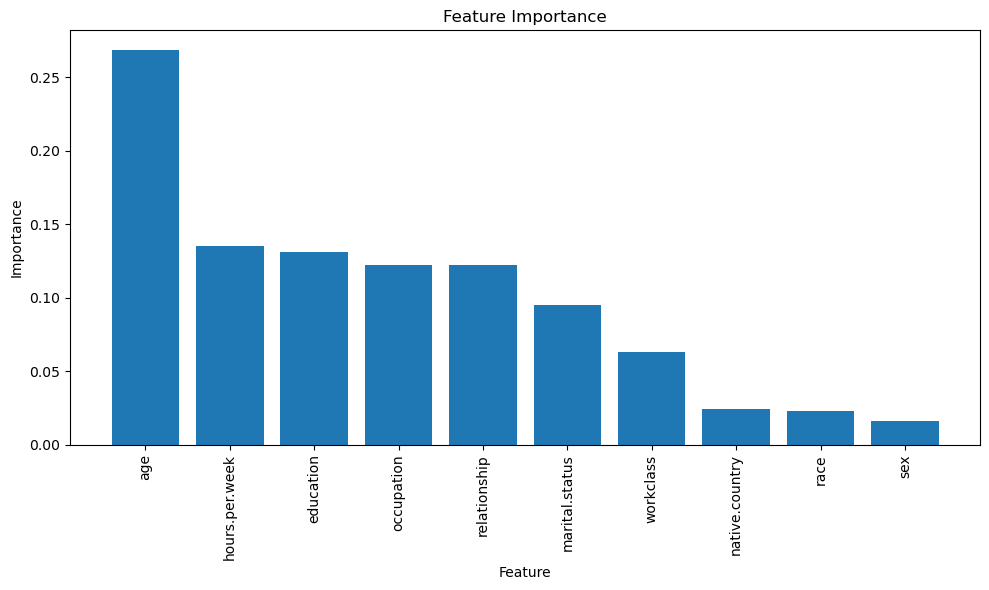

In [29]:
# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


The outcome of feature importance analysis reveals that age is the most influential factor in predicting income levels within the dataset. This finding underscores the significance of age in determining earning potential and socioeconomic status, reflecting the cumulative impact of career progression, experience, and life stage factors on income levels. Understanding the pivotal role of age provides valuable insights for decision-making in various domains, including targeted marketing, financial planning, and policy development. Moreover, it highlights the complex interplay between individual characteristics and socioeconomic factors in shaping income disparities and economic outcomes. By recognizing age as a key predictor of income, stakeholders can make informed decisions to address income inequality, support career development, and enhance financial well-being across different age groups.

# Business Problem #2
Employment Pattern Analysis:

Dependent Variable (DV): Workclass
Predictor Variables (IVs): Age, education, marital status, occupation, sex, native country, race.
Objective: Analyze the distribution of employment across different demographic groups and identify factors influencing the type of work individuals are engaged in.

For the second business problem, Employment Pattern Analysis, we aim to explore the distribution of workclass (employment type) across different demographic groups and identify factors influencing individuals' employment patterns. 

# Preliminary Exploration:

Examine the distribution of workclass across demographic variables such as age, education, marital status, occupation, sex, native country, and race.

Identify any noticeable trends or patterns in the distribution of workclass among different demographic groups.

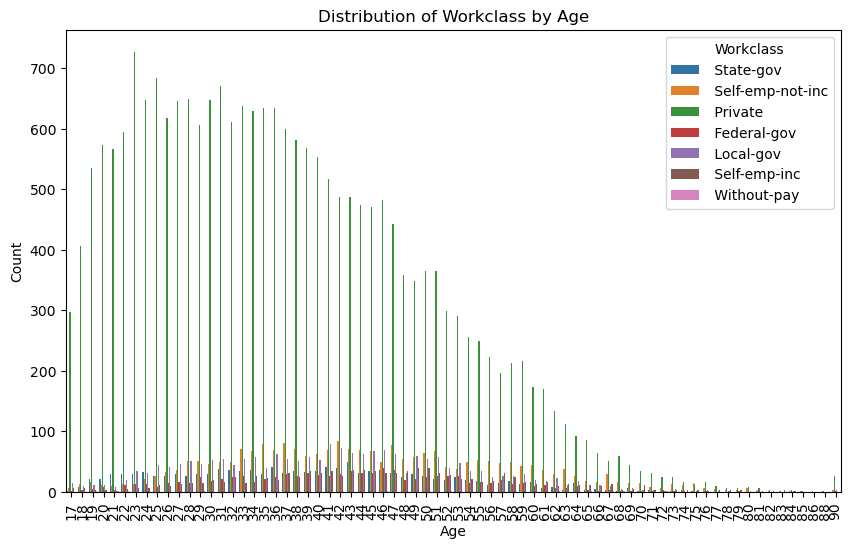

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
age,,,,,,,
36,24,63,634,20,70,41,0
31,22,54,671,17,49,38,0
33,26,54,637,14,71,35,0
34,17,58,630,27,67,37,0
37,30,55,599,32,81,31,0
...,...,...,...,...,...,...,...
82,0,0,3,2,2,0,0
83,0,0,1,3,1,0,0
85,0,0,2,0,1,0,0


In [30]:
# Distribution of workclass by age
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='workclass', data=data)
plt.title('Distribution of Workclass by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Workclass', loc='upper right')
plt.show()

workclass_by_age = data.groupby(['age', 'workclass']).size().unstack(fill_value=0)
workclass_by_age = workclass_by_age.reindex(workclass_by_age.sum(axis=1).sort_values(ascending=False).index, axis=0)
workclass_by_age



The distribution of work classes across different age groups can be observed by examining the counts in each column, where each column represents a specific work class, within each row corresponding to an age group.

For instance, in the first row (age 36), the highest count is observed in the "Private" work class category, suggesting that the majority of individuals in this age group are employed in the private sector. Additionally, there are smaller numbers of individuals distributed across other work class categories.



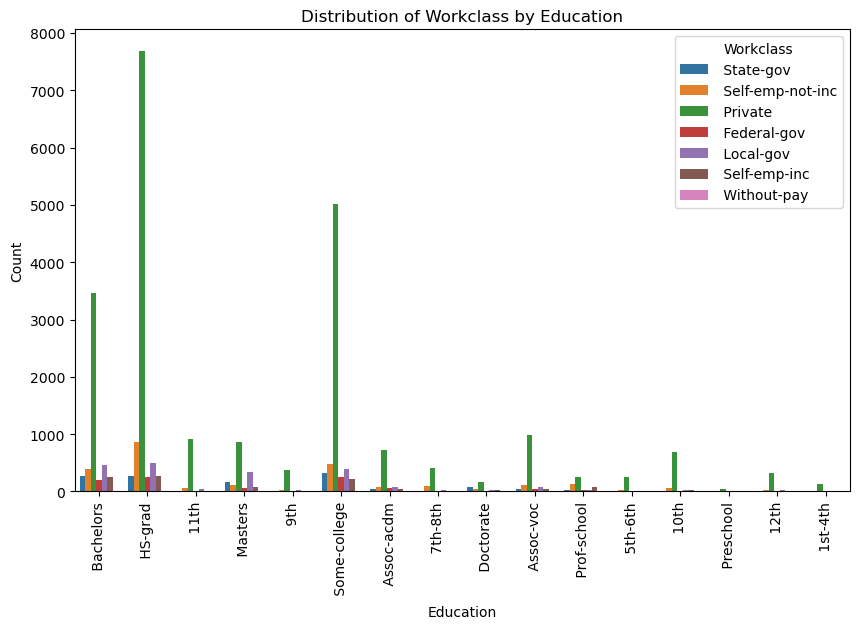

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
education,,,,,,,
HS-grad,260,498,7678,270,857,268,9
Some-college,251,385,5016,223,481,319,3
Bachelors,207,470,3455,259,387,266,0
Masters,65,336,863,77,120,166,0
Assoc-voc,38,85,993,37,108,46,0
11th,9,36,917,13,59,14,0
Assoc-acdm,55,86,720,35,70,41,1
10th,6,31,686,19,65,13,0
7th-8th,2,27,414,10,93,10,1


In [31]:
# Distribution of Workclass by Education
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='workclass', data=data)
plt.title('Distribution of Workclass by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Workclass', loc='upper right')
plt.show()


workclass_by_education = data.groupby(['education', 'workclass']).size().unstack(fill_value=0)
workclass_by_education = workclass_by_education.reindex(workclass_by_education.sum(axis=1).sort_values(ascending=False).index, axis=0)
workclass_by_education


In the first row (HS-grad), the highest count is observed in the "Private" work class category, indicating that a significant number of individuals with a high school diploma are employed in the private sector.

The table illustrates that across various education levels, the "Private" sector consistently has the highest count of individuals employed. This suggests that the private sector tends to offer more employment opportunities compared to other work class categories, regardless of the level of education.

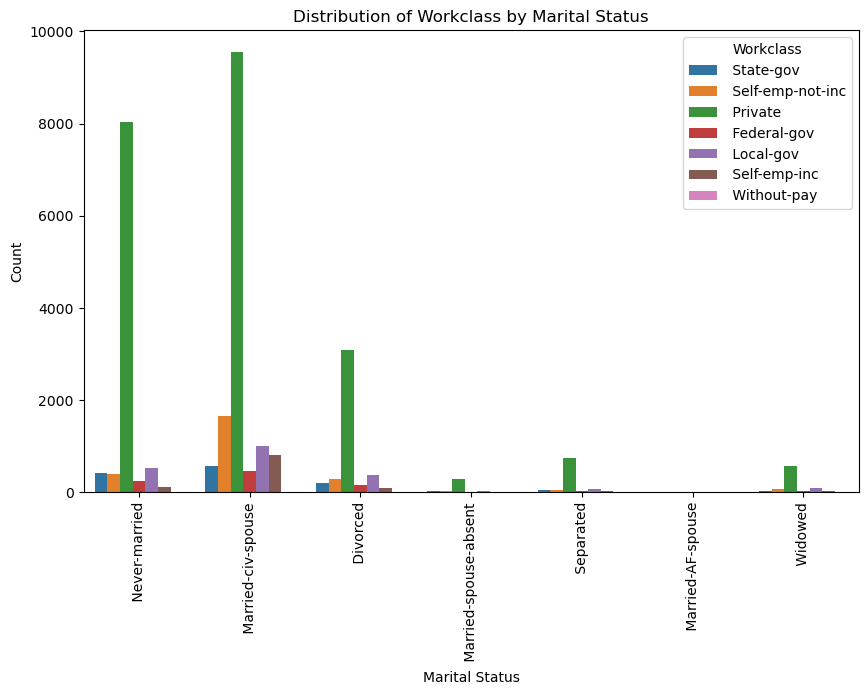

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
marital.status,,,,,,,
Married-civ-spouse,462,1013,9550,802,1655,575,8
Never-married,240,524,8025,122,401,410,4
Divorced,166,363,3093,98,285,209,0
Separated,25,60,741,20,52,41,0
Widowed,36,86,577,28,73,26,1
Married-spouse-absent,11,21,285,4,31,17,1
Married-AF-spouse,3,0,15,0,2,1,0


In [32]:
#Distribution of Workclass by Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x='marital.status', hue='workclass', data=data)
plt.title('Distribution of Workclass by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Workclass', loc='upper right')
plt.show()

workclass_by_marital = data.groupby(['marital.status', 'workclass']).size().unstack(fill_value=0)
workclass_by_marital = workclass_by_marital.reindex(workclass_by_marital.sum(axis=1).sort_values(ascending=False).index, axis=0)
workclass_by_marital


Within the "Private" sector, the majority of individuals are "Married-civ-spouse," followed by "Never-married," "Divorced," "Separated," "Widowed," "Married-spouse-absent," and "Married-AF-spouse.

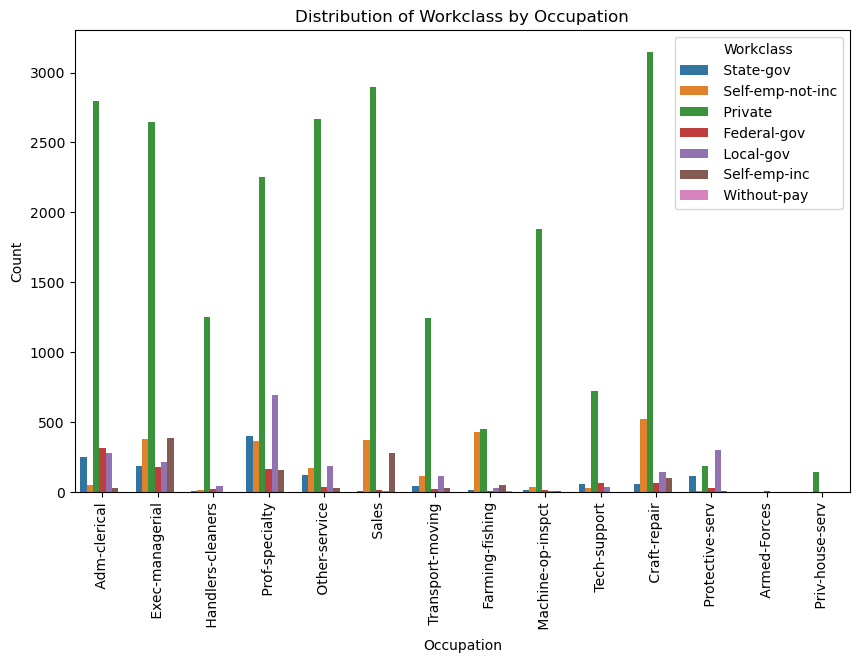

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
occupation,,,,,,,
Prof-specialty,167,692,2254,157,365,403,0
Craft-repair,63,143,3146,99,523,55,1
Exec-managerial,179,212,2647,385,383,186,0
Adm-clerical,316,281,2793,28,49,251,3
Sales,14,7,2895,281,376,11,0
Other-service,34,189,2665,27,173,123,1
Machine-op-inspct,14,11,1882,10,35,13,1
Transport-moving,24,115,1247,26,118,41,1
Handlers-cleaners,22,46,1255,2,15,9,1


In [33]:
# Distribution of Workclass by Occupation
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', hue='workclass', data=data)
plt.title('Distribution of Workclass by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Workclass', loc='upper right')
plt.show()

workclass_by_occupation = data.groupby(['occupation', 'workclass']).size().unstack(fill_value=0)
workclass_by_occupation = workclass_by_occupation.reindex(workclass_by_occupation.sum(axis=1).sort_values(ascending=False).index, axis=0)
workclass_by_occupation


This table presents the distribution of individuals across different occupations within each work class category. For example, within the "Private" sector, the majority of individuals are employed in "Craft-repair," followed by "Adm-clerical," "Sales," "Other-service," "Machine-op-inspct," "Transport-moving," "Handlers-cleaners," "Farming-fishing," "Tech-support," "Prof-specialty," "Exec-managerial," "Protective-serv," "Local-gov," "Priv-house-serv," "Self-emp-not-inc," "State-gov," "Self-emp-inc," and "Federal-gov." 

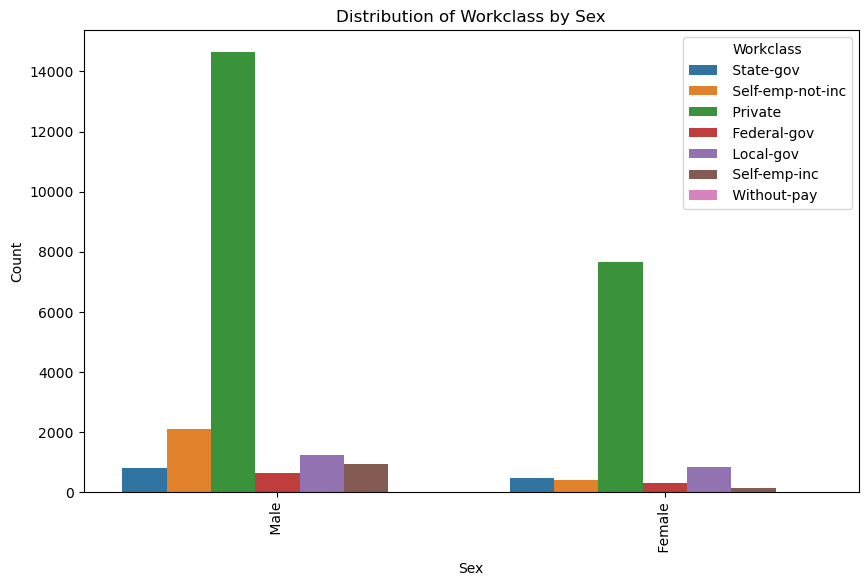

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
sex,,,,,,,
Male,634,1243,14644,948,2107,795,9
Female,309,824,7642,126,392,484,5


In [34]:
#Distribution of Workclass by Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='workclass', data=data)
plt.title('Distribution of Workclass by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Workclass', loc='upper right')
plt.show()

workclass_by_sex = data.groupby(['sex', 'workclass']).size().unstack(fill_value=0)
workclass_by_sex = workclass_by_sex.reindex(workclass_by_sex.sum(axis=1).sort_values(ascending=False).index, axis=0)
workclass_by_sex


This table illustrates the distribution of individuals across different work classes based on their gender. In the "Private" sector, for instance, there are 14,644 males and 7,642 females employed. 

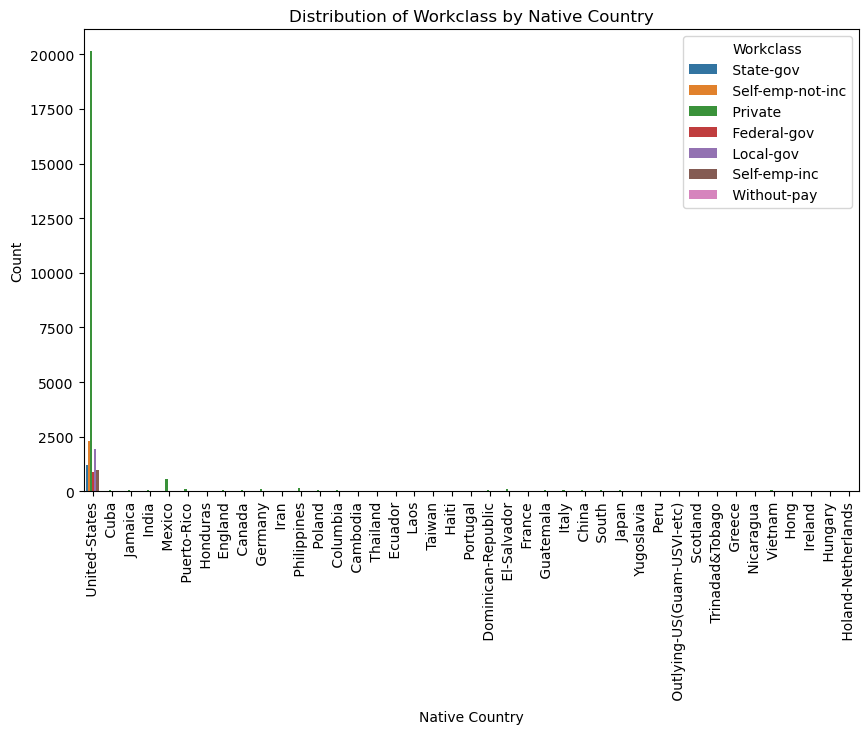

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
native.country,,,,,,,
United-States,886,1956,20135,991,2313,1210,13
Mexico,1,18,553,8,27,3,0
Philippines,12,10,155,2,5,3,1
Germany,5,9,97,6,6,5,0
Puerto-Rico,8,7,85,0,5,4,0
Canada,2,6,79,6,11,3,0
El-Salvador,2,5,88,1,4,0,0
India,2,2,70,7,7,12,0
Cuba,2,4,69,9,8,0,0


In [35]:
#Distribution of Workclass by Native Country
plt.figure(figsize=(10, 6))
sns.countplot(x='native.country', hue='workclass', data=data)
plt.title('Distribution of Workclass by Native Country')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Workclass', loc='upper right')
plt.show()

workclass_by_country = data.groupby(['native.country', 'workclass']).size().unstack(fill_value=0)
workclass_by_country = workclass_by_country.reindex(workclass_by_country.sum(axis=1).sort_values(ascending=False).index, axis=0)
workclass_by_country


This table displays the distribution of individuals across different work classes based on their native country. For example, in the "Private" sector, there are 20,135 individuals from the United States, 553 from Mexico, 155 from the Philippines, and so forth. 

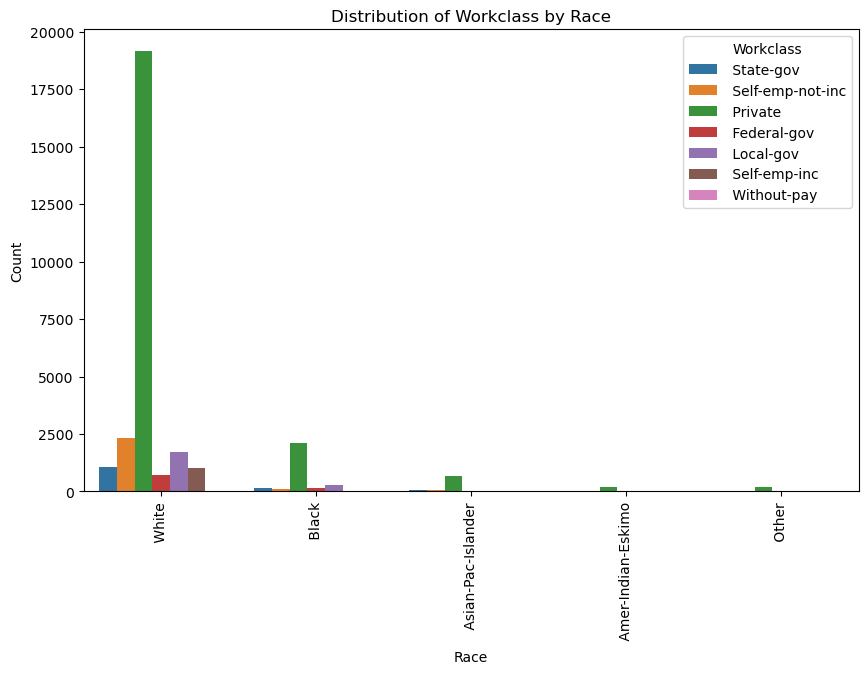

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
race,,,,,,,
White,710,1704,19137,1006,2314,1050,12
Black,168,282,2100,23,87,156,1
Asian-Pac-Islander,40,39,655,39,67,54,1
Amer-Indian-Eskimo,19,36,190,2,24,15,0
Other,6,6,204,4,7,4,0


In [36]:
# Distribution of Workclass by Race
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='workclass', data=data)
plt.title('Distribution of Workclass by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Workclass', loc='upper right')
plt.show()

workclass_by_race = data.groupby(['race', 'workclass']).size().unstack(fill_value=0)
workclass_by_race = workclass_by_race.reindex(workclass_by_race.sum(axis=1).sort_values(ascending=False).index, axis=0)
workclass_by_race


This table illustrates the distribution of individuals across various races within different work classes. For instance, in the "Private" sector, there are 19,137 individuals identified as White, 2,100 as Black, 655 as Asian-Pacific-Islander, and so on.

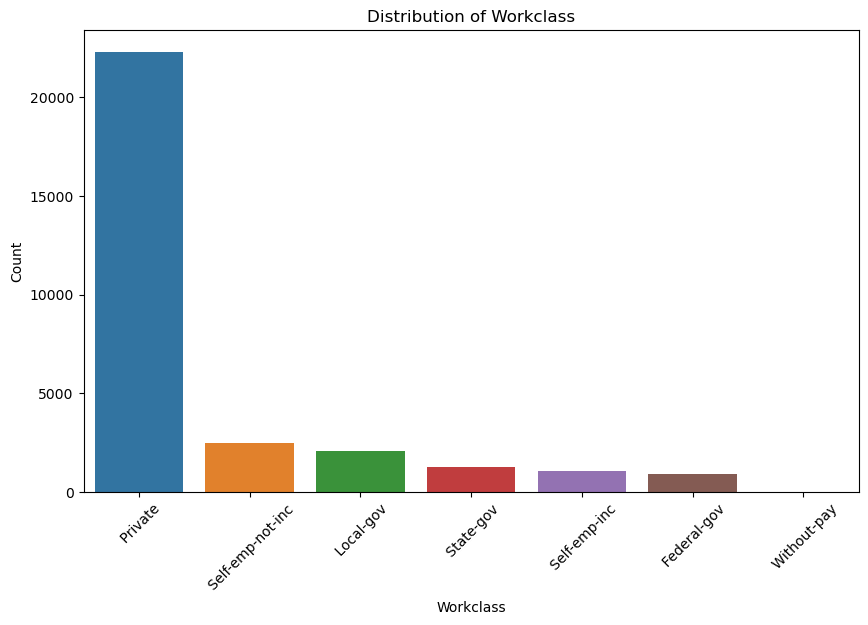

In [37]:
# Count the number of individuals in each workclass category
workclass_counts = data['workclass'].value_counts()

# Plot the distribution using a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', data=data, order=workclass_counts.index)
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


The distribution of workclass indicates that the majority of individuals in the dataset are employed in the private sector, followed by self-employment in non-incorporated businesses. Federal government employment has the lowest count among the different workclass categories."

# Modelling
For this analysis, two machine learning models, Gradient Boosting Classifier and Support Vector Machine Classifier (SVM), are employed to predict workclass based on demographic and employment-related attributes.

Both models demonstrates effectiveness in predicting workclass, showcasing the potential for leveraging machine learning techniques to understand employment patterns based on demographic factors. Further optimization and fine-tuning could enhance model performance for real-world applications.

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


# Specify predictor variables
X = df[['age', 'education', 'marital.status', 'occupation', 'sex', 'native.country', 'race']]

# Specify target variable
y = df['workclass']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [39]:
# Define the models
gb_classifier = GradientBoostingClassifier()
svm_classifier = SVC()

# Define parameter grid for hyperparameter tuning
param_grid_gb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.05, 0.01]}
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}

# Perform hyperparameter tuning using GridSearchCV
grid_search_gb = GridSearchCV(gb_classifier, param_grid_gb, cv=5)
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5)

# Fit the models
grid_search_gb.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)

# Get best parameters for each model
best_params_gb = grid_search_gb.best_params_
best_params_svm = grid_search_svm.best_params_

# Evaluate models
gb_accuracy = grid_search_gb.best_score_
svm_accuracy = grid_search_svm.best_score_

# Print mean CV accuracy
print("Mean CV accuracy for Gradient Boosting Classifier:", gb_accuracy)
print("Mean CV accuracy for Support Vector Machine Classifier:", svm_accuracy)

Mean CV accuracy for Gradient Boosting Classifier: 0.7505077118973436
Mean CV accuracy for Support Vector Machine Classifier: 0.7393592822986028



The mean cross-validation accuracy for the Gradient Boosting Classifier is approximately 0.7505, while the mean cross-validation accuracy for the Support Vector Machine Classifier is approximately 0.7394. This suggests that, on average, the Gradient Boosting Classifier performs slightly better in terms of accuracy compared to the Support Vector Machine Classifier.

In [42]:
# Predictions
gb_predictions = grid_search_gb.predict(X_test)
svm_predictions = grid_search_svm.predict(X_test)

# Accuracy Metrics
gb_accuracy = accuracy_score(y_test, gb_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Classification Reports
gb_classification_report = classification_report(y_test, gb_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)



/Users/lape/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lape/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lape/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lape/anaconda3/lib/pytho

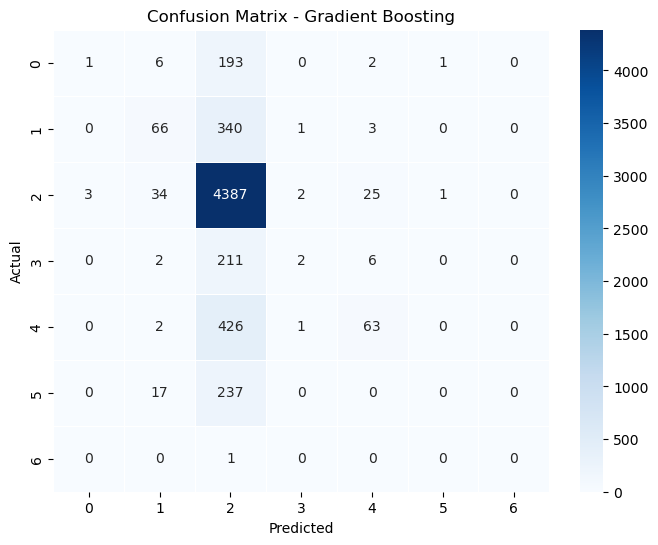

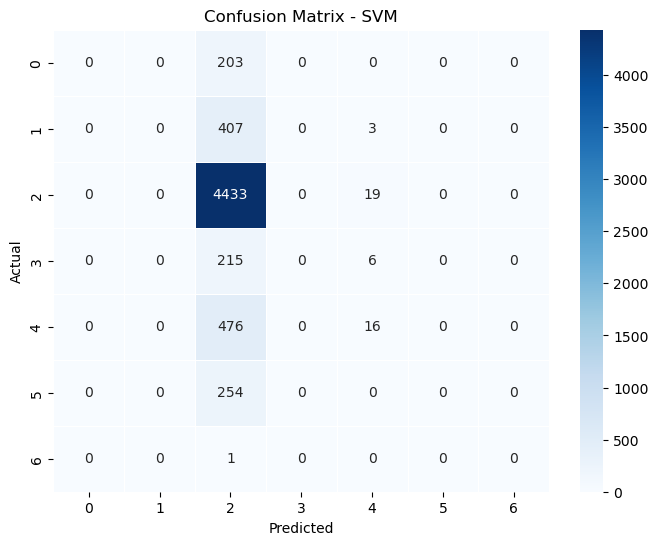

In [45]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Confusion Matrices
gb_conf_matrix = confusion_matrix(y_test, gb_predictions)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

# Plot Confusion Matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

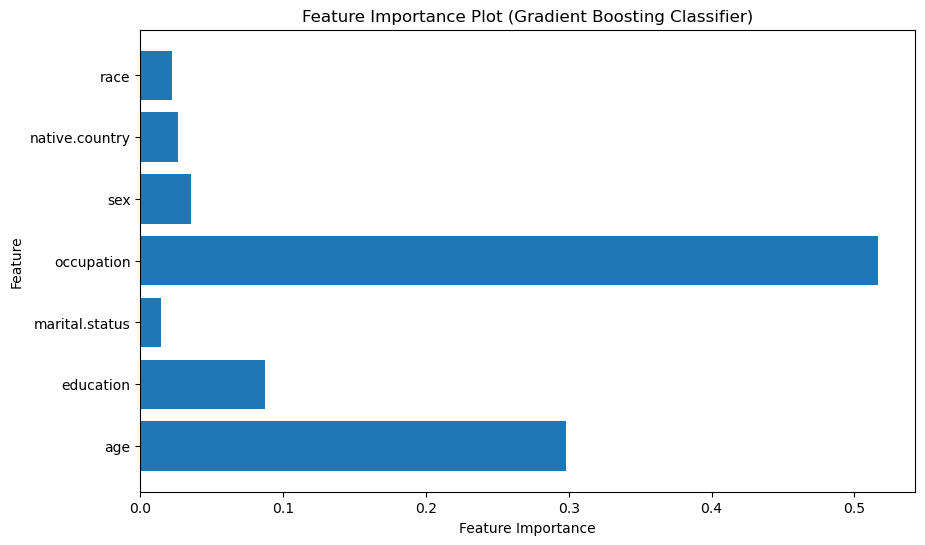

In [46]:
# Visualize feature importance for Gradient Boosting Classifier
feature_importance_gb = grid_search_gb.best_estimator_.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance_gb)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot (Gradient Boosting Classifier)')
plt.show()

The feature importance analysis reveals that "occupation" has the highest importance, it suggests that this feature plays a significant role in predicting the target variable (in this case, workclass).

This finding implies that the type of occupation someone is engaged in has a strong influence on their workclass. For example, certain occupations may be more prevalent in specific workclass categories, such as "Private" or "Government."

In [47]:
# Summary
print("Best parameters for Gradient Boosting Classifier:", best_params_gb)
print("Best parameters for Support Vector Machine Classifier:", best_params_svm)
print("Accuracy of Gradient Boosting Classifier:", gb_accuracy)
print("Accuracy of Support Vector Machine Classifier:", svm_accuracy)


Best parameters for Gradient Boosting Classifier: {'learning_rate': 0.1, 'n_estimators': 100}
Best parameters for Support Vector Machine Classifier: {'C': 1, 'gamma': 0.1}
Accuracy of Gradient Boosting Classifier: 0.7490469086689873
Accuracy of Support Vector Machine Classifier: 0.7374440576827449


These results suggest that for the Gradient Boosting Classifier, the best parameters found through tuning are a learning rate of 0.1 and 100 estimators (trees).

For the Support Vector Machine Classifier, the optimal parameters are a regularization parameter (C) of 1 and a gamma value of 0.1.

The accuracy achieved by the Gradient Boosting Classifier is approximately 74.90%, while the Support Vector Machine Classifier achieves an accuracy of about 73.74%.

These accuracies provide insights into how well each model performs in predicting the workclass based on the given features. The Gradient Boosting Classifier slightly outperforms the Support Vector Machine Classifier in terms of accuracy.

In conclusion, the analysis provides valuable insights into both income prediction and employment patterns. Age and occupation stand out as crucial predictors in both scenarios, emphasizing the significance of demographic and employment-related factors in determining socio-economic outcomes. These findings can aid policymakers, businesses, and individuals in making informed decisions regarding employment opportunities, skill development, and income generation strategies.

# Reference

https://www.kaggle.com/code/parteekjain2811/adult-sensus-income-prediction


